#**Week 10 - Case Study on Pre-processsing**



> _Do the following on titanic dataset:_

1.   **Load the dataset into python environment**
2.   **Make 'PassengerId' as the index column**
3.   **Check the basic details of the dataset**
4.   **Fill in all the missing values present in all the columns in the dataset**
5.   **Check and handle outliers in atleast 3 columns in the dataset**
6.   **Do min max scaling on the feature set (Take 'Survived' as target)**


##**1. Load the dataset into python environment**

######***Importing necessary libraries***

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


######***Reading dataset titanic_dataset.csv in to Python Environment using read_csv(). The first 5 observations are displayed.***

In [62]:
df=pd.read_csv('/content/gdrive/MyDrive/ICTAK/titanic_dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##**2. Make 'PassengerId' as the index column**

In [63]:
df=pd.read_csv('/content/gdrive/MyDrive/ICTAK/titanic_dataset.csv', index_col='PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##**3. Check the basic details of the dataset**

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [65]:
df.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Sheerlinck, Mr. Jan Baptist",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


######***Finding the no: of Observations***

In [66]:
df.shape

(891, 11)

######***Checking for null values***

In [67]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

##**Insights:**


*   The dataset contains the details of passengers who travelled in Titanic, like -
      *   _**PassengerId** - Unique Id of a Passenger_
      *   _**Survived** - If the passenger survived. [ 0=No, 1=Yes ]_
      *   _**Pclass** - Passenger Class [1=First Class, 2=Second Class, 3=Third Class ]_
      *   _**Name** - Name of the Passenger_
      *   _**Sex** - Male/Female_
      *   _**Age** - Passenger age in years_
      *   _**SibSp** - No: of Siblings/Spouses aboard_
      *   _**Parch** - No: of parents/children aboard_
      *   _**Ticket** - Ticket Number_
      *   _**Fare** - Passenger Fare_
      *   _**Cabin** - Cabin Number_
      *   _**Embarked** - Port of Embarkation [ S=Southampton, C=Cherbourg, Q=Queenstown ]_
*   **891 Observations** and **11 Features(+ PassengerID)** are found.
*   The **Null values** are recorded for:
      *   _The feature **Age** contains **177** null observations_
      *   _The feature **Cabin** contains **687** null observations_
      *   _The feature **Embarked** contains **2** null observations_
*  The **datatype** for the features - 
      *   _**Survived, Pclass, SibSp, Parch**  - are given as Integer with 64-bits_
      *   _**Name, Sex, Ticket, Cabin, Embarked** - are given as Objects_
      *   _**Age, Fare** - are given as Float with 64-bits_
*   The range of values:
      *   _The **age** ranges from **0 to 80**_
      *   _The **SibSp** ranges from **0 to 8**_
      *   _The **Parch** ranges from **0 to 6**_
      *   _The **Fare** ranges from **0 to 512.3**_



######***Count Plot for Sex Vs Survived in each Passenger Class***

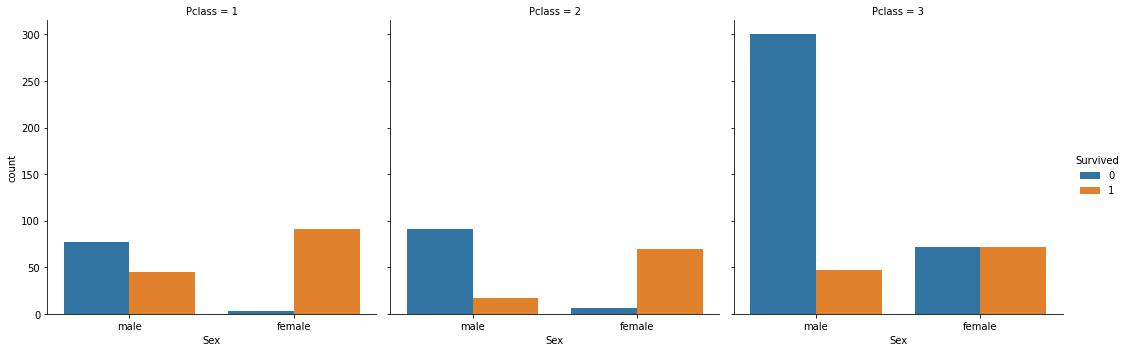

In [68]:
sns.catplot(x ="Sex", hue ="Survived", col ='Pclass', kind ="count", data = df)

##**Insights:**
_Just by observing the graph, it can be approximated that the survival rate of women is greater than that of men and is found high in First class_

######***Violin Plot for Age Vs Survived***

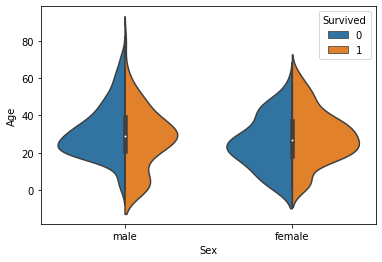

In [69]:
sns.violinplot(x ="Sex", y ="Age", hue ="Survived",data = df, split = True)

##**Insights:**
_Just by observing the graph, the survival rate is_ 
*   High for women in the age range 20-50.
*   Less for men as the age increases.

##**4. Fill in all the missing values present in all the columns in the dataset**

In [70]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

######***Filling the missing values for the column Age by Median***

In [71]:
df['Age']=df['Age'].fillna(df['Age'].median())

######***Checking whether the Age column is filled or not***

In [72]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

######***Filling the missing values for the column Cabin by Mode***

In [73]:
df['Cabin']=df['Cabin'].fillna(df['Cabin'].mode()[2])

######***Checking whether the column Cabin is filled or not***

In [74]:
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    2
dtype: int64

######***Filling the missing values for the column Embarked by Mode***

In [75]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

######***Checking whether the column Embarked is filled or not***

In [76]:
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

##**5. Check and handle outliers in atleast 3 columns in the dataset**

######***5.1 Checking outliers for the column Age by Box Plot***

{'boxes': [<matplotlib.lines.Line2D at 0x7f81f2665a10>],
 'caps': [<matplotlib.lines.Line2D at 0x7f81f2669a90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f81f266fad0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f81f266f590>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f81f2665fd0>,
  <matplotlib.lines.Line2D at 0x7f81f2669550>]}

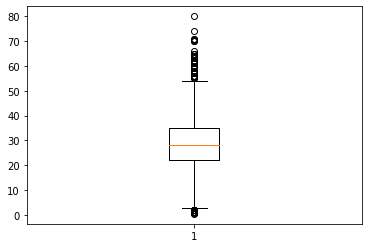

In [77]:
plt.boxplot(df['Age'])

######***5.1 Handling outliers for the column Age by removing the values below the lower limit***

In [78]:
Q1=np.percentile(df['Age'],25,interpolation='midpoint')
Q2=np.percentile(df['Age'],50,interpolation='midpoint')
Q3=np.percentile(df['Age'],75,interpolation='midpoint')
IQR=Q3-Q1
low_limit=Q1-1.5*IQR
up_limit=Q3-1.5*IQR
df.drop(df.loc[df['Age']<low_limit].index, inplace=True) 

{'boxes': [<matplotlib.lines.Line2D at 0x7f81f25daad0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f81f25ddb50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f81f25e5b90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f81f25e5650>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f81f25dd0d0>,
  <matplotlib.lines.Line2D at 0x7f81f25dd610>]}

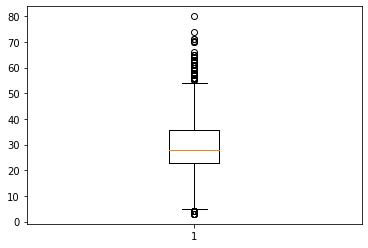

In [79]:
plt.boxplot(df['Age'])

######***5.2 Checking outliers for the column SibSp by Box Plot***

{'boxes': [<matplotlib.lines.Line2D at 0x7f81f254db90>],
 'caps': [<matplotlib.lines.Line2D at 0x7f81f2554bd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f81f255cc10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f81f255c6d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f81f2554150>,
  <matplotlib.lines.Line2D at 0x7f81f2554690>]}

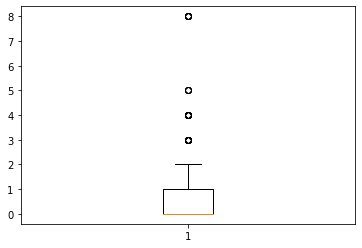

In [80]:
plt.boxplot(df['SibSp'])

######***5.2 Handling outliers for the column SibSp by removing the values above the upper limit***

In [81]:
Q1=np.percentile(df['SibSp'],25,interpolation='midpoint')
Q2=np.percentile(df['SibSp'],50,interpolation='midpoint')
Q3=np.percentile(df['SibSp'],75,interpolation='midpoint')
IQR=Q3-Q1
low_limit=Q1-1.5*IQR
up_limit=Q3-1.5*IQR 
df[df['SibSp']>up_limit].shape

(867, 11)

##**Insights:**
  _Failed to remove the outliers! If we remove 867 outliers from the column SibSp, which may lead to emptying the dataset._ 

######***5.3 Checking outliers for the column Fare by Box Plot***

{'boxes': [<matplotlib.lines.Line2D at 0x7f81f24c6b10>],
 'caps': [<matplotlib.lines.Line2D at 0x7f81f24ceb90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f81f24d4bd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f81f24d4690>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f81f24ce110>,
  <matplotlib.lines.Line2D at 0x7f81f24ce650>]}

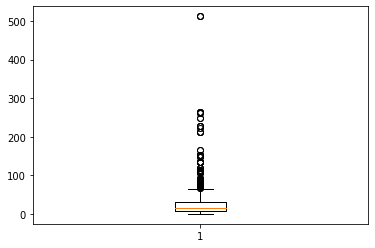

In [82]:
plt.boxplot(df['Fare'])

######***5.3 Handling outliers for the column Fare by removing the values above the upper limit***

In [83]:
Q1=np.percentile(df['Fare'],25,interpolation='midpoint')
Q2=np.percentile(df['Fare'],50,interpolation='midpoint')
Q3=np.percentile(df['Fare'],75,interpolation='midpoint')
IQR=Q3-Q1
low_limit=Q1-1.5*IQR
up_limit=Q3-1.5*IQR 
df[df['Fare']>up_limit].shape

(867, 11)

##**Insights:**
  _Failed to remove the outliers! If we remove 867 outliers from the column Fare, which may lead to emptying the dataset._ 

##**6. Do min max scaling on the feature set (Take 'Survived' as target)**

######***Before performing MinMax Scaling***

In [84]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000
mean,0.377163,2.302191,30.137255,0.490196,0.354095,32.119621
std,0.484956,0.839846,12.322278,1.069559,0.795696,50.006446
min,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,23.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.108300
75%,1.000000,3.000000,35.500000,1.000000,0.000000,30.847900
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


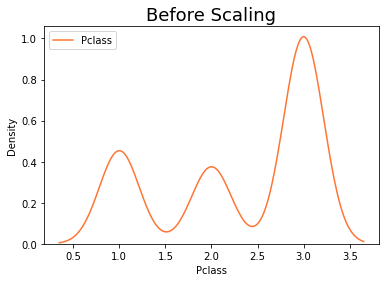

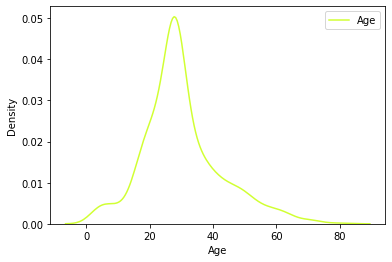

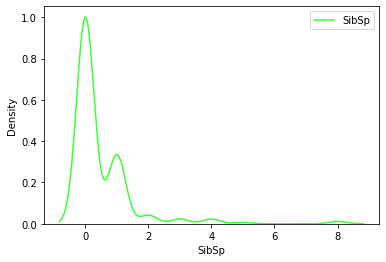

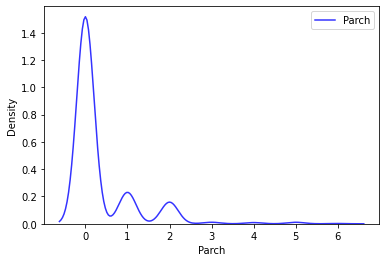

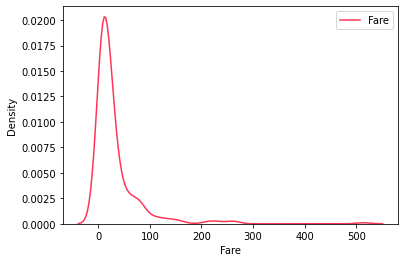

In [85]:
plt.title('Before Scaling', fontsize=18)
for i,j in zip(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'],['#FF7433','#D1FF33', '#3AFF33', '#3433FF', '#FF3358']):    
  sns.kdeplot(df[i], color =j, label=i)
  plt.legend(fontsize=10)
  print()
  plt.show()

######***Performing MinMax scaling on the features - Pclass, Age, SibSp, Parch, Fare, to shrink the data within the given range, ie 0 to 1***

In [86]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
df[['Pclass','Age','SibSp','Parch','Fare']] = scaler.fit_transform(df[['Pclass','Age','SibSp','Parch','Fare']])
df[['Pclass','Age','SibSp','Parch','Fare']] = pd.DataFrame(df[['Pclass','Age','SibSp','Parch','Fare']])

######***After performing MinMax Scaling***

In [87]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000
mean,0.377163,0.651096,0.352432,0.061275,0.059016,0.062693
std,0.484956,0.419923,0.160030,0.133695,0.132616,0.097606
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.259740,0.000000,0.000000,0.015412
50%,0.000000,1.000000,0.324675,0.000000,0.000000,0.027538
75%,1.000000,1.000000,0.422078,0.125000,0.000000,0.060211
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


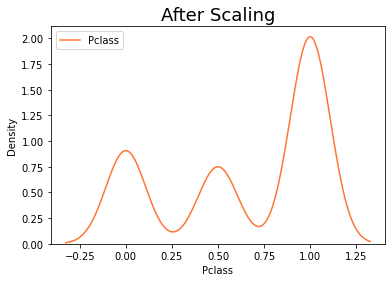

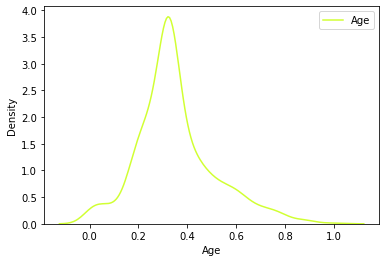

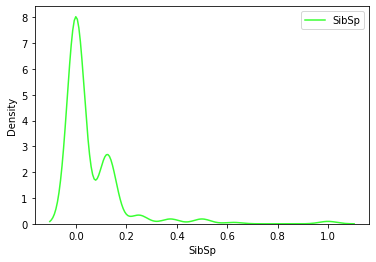

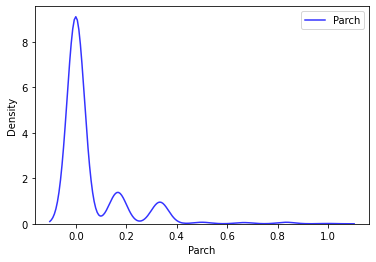

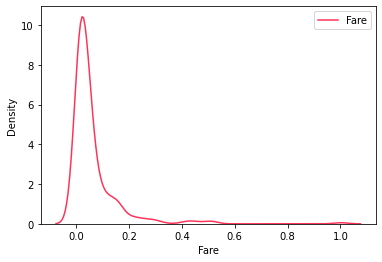

In [88]:
plt.title('After Scaling', fontsize=18)
for i,j in zip(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'],['#FF7433','#D1FF33', '#3AFF33', '#3433FF', '#FF3358']):    
  sns.kdeplot(df[i], color =j, label=i)
  plt.legend(fontsize=10)
  print()
  plt.show()